In [1]:
#考虑一个神经网络，结构如下：

#两个输入节点 (x_1, x_2)
#一个隐藏层，包含一个神经元 (h)，使用 Tanh 激活函数 ( \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} )
#一个输出节点 (y_{pred})，使用 线性 激活函数 (即 (y_{pred} = z_2))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#计算tanh函数
def tanh(a):
  return np.tanh(a)

In [8]:
#前向传播，计算输出y_pred
def forward(w_11, w_12, b_1, b_2, w_2, x_1, x_2):
  z = w_11 * x_1 + w_12 * x_2 + b_1
  h = np.tanh(z)

  y_pred = w_2 * h + b_2
  return y_pred, h

In [2]:
#计算损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred- y_true)**2 /2
  return loss

In [10]:
#反向传播，计算梯度
def backward(y_pred, y_true, h, w_2, x_1, x_2):
  b2_grad = y_pred - y_true
  w2_grad = b2_grad * h

  b1_grad = b2_grad * w_2 * (1 - h**2)
  w11_grad = b1_grad * x_1
  w12_grad = b1_grad * x_2
  return w11_grad, w12_grad, w2_grad, b1_grad, b2_grad

In [17]:
#更新参数,params
def update_params(w_11, w_12, b_1, b_2, w_2, w11_grad, w12_grad, w2_grad, b1_grad, b2_grad, learning_rate):
  w_11 -= learning_rate * w11_grad
  w_12 -= learning_rate * w12_grad
  w_2 -= learning_rate * w2_grad
  b_1 -= learning_rate * b1_grad
  b_2 -= learning_rate * b2_grad
  return w_11, w_12, w_2, b_1, b_2

Epochs: 1 loss: 0.1551 w11_grad: -0.22 w12_grad: 0.11 w2_grad: -0.32 b1_grad: -0.22 b2_grad: -0.56
Epochs: 11 loss: 0.1099 w11_grad: -0.19 w12_grad: 0.09 w2_grad: -0.28 b1_grad: -0.19 b2_grad: -0.47
Epochs: 21 loss: 0.0774 w11_grad: -0.16 w12_grad: 0.08 w2_grad: -0.25 b1_grad: -0.16 b2_grad: -0.39
Epochs: 31 loss: 0.0542 w11_grad: -0.13 w12_grad: 0.07 w2_grad: -0.21 b1_grad: -0.13 b2_grad: -0.33
Epochs: 41 loss: 0.0379 w11_grad: -0.11 w12_grad: 0.05 w2_grad: -0.18 b1_grad: -0.11 b2_grad: -0.28
Epochs: 51 loss: 0.0264 w11_grad: -0.09 w12_grad: 0.04 w2_grad: -0.15 b1_grad: -0.09 b2_grad: -0.23
Epochs: 61 loss: 0.0183 w11_grad: -0.07 w12_grad: 0.04 w2_grad: -0.13 b1_grad: -0.07 b2_grad: -0.19
Epochs: 71 loss: 0.0127 w11_grad: -0.06 w12_grad: 0.03 w2_grad: -0.11 b1_grad: -0.06 b2_grad: -0.16
Epochs: 81 loss: 0.0088 w11_grad: -0.05 w12_grad: 0.03 w2_grad: -0.09 b1_grad: -0.05 b2_grad: -0.13
Epochs: 91 loss: 0.0061 w11_grad: -0.04 w12_grad: 0.02 w2_grad: -0.08 b1_grad: -0.04 b2_grad: -0.11
E

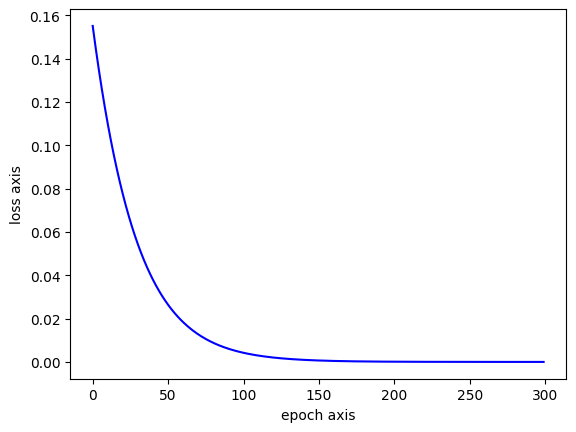

In [23]:
#初始化参数
w_11 = 0.4
w_12 = -0.3
b_1 = 0.1
w_2 = 0.6
b_2 = -0.2
#训练样本:

x_1 = 1.0
x_2 = -0.5
y_true = 0.7
learning_rate = 0.01

losses = []
epochs = 300


for epoch in range(epochs):
  y_pred, h = forward(w_11, w_12, b_1, b_2, w_2, x_1, x_2)

  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  w11_grad, w12_grad, w2_grad, b1_grad, b2_grad = backward(y_pred, y_true, h, w_2, x_1, x_2)
  w_11, w_12, w_2, b_1, b_2 = update_params(w_11, w_12, b_1, b_2, w_2, w11_grad, w12_grad, w2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%10 == 0:
    print("Epochs:", epoch + 1,
      "loss:", np.round(loss, 4),
      "w11_grad:", np.round(w11_grad, 2),
      "w12_grad:", np.round(w12_grad, 2),
      "w2_grad:", np.round(w2_grad, 2),
      "b1_grad:", np.round(b1_grad, 2),
      "b2_grad:", np.round(b2_grad, 2)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()